## It helps us to determine which Model should we use for a data set

K-fold cross validation guarantees that the score of our model does not depend on the way we picked the train and test set. The data set is divided into k number of subsets and the holdout method is repeated k number of times.

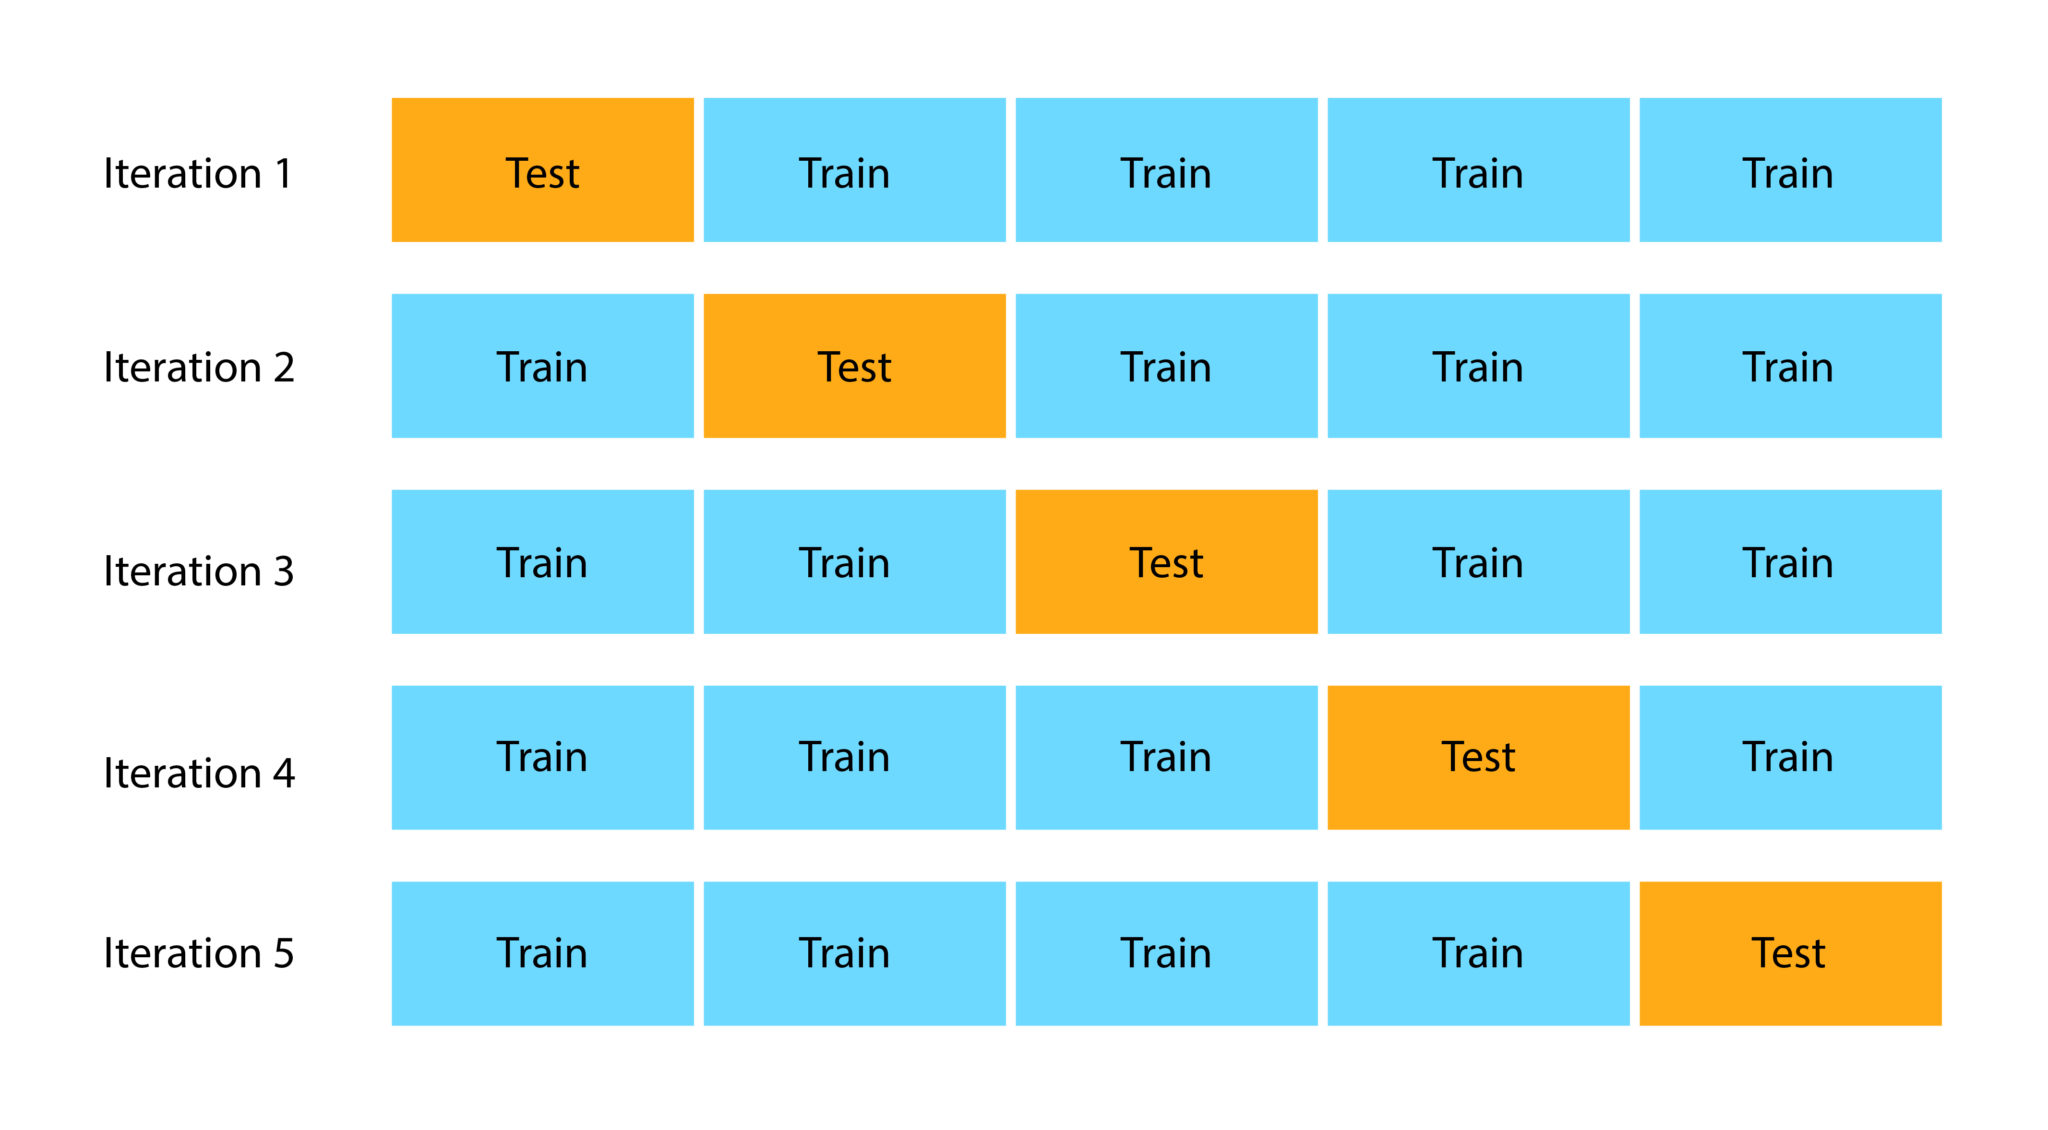

 Let us go through this in steps:

->**Randomly** split your entire dataset into k number of folds (subsets)

->For each fold in your dataset, build your model on k – 1 folds of the dataset. Then, test the model to check the effectiveness for kth fold

->Repeat this until each of the k-folds has served as the test set

->The average of your k recorded accuracy is called the cross-validation accuracy and will serve as your performance metric for the model.

In [1]:
from sklearn.datasets import load_digits
import pandas as pd

In [2]:
data=load_digits()
dir(data)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [3]:
## importing models

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.svm import SVC

In [4]:
from sklearn.model_selection import cross_val_score

In [8]:
cross_val_score(LogisticRegression(max_iter=10000),data.data,data.target)

array([0.925     , 0.875     , 0.93871866, 0.93314763, 0.89693593])

In [12]:
#cv determines number of folds # 8 values are there in array 
cross_val_score(DecisionTreeClassifier(),data.data,data.target,cv=8)   

array([0.79555556, 0.89333333, 0.67555556, 0.77777778, 0.83555556,
       0.88839286, 0.87053571, 0.75      ])

In [42]:
cross_val_score(RandomForestClassifier(n_estimators=30),data.data,data.target)

array([0.90833333, 0.90277778, 0.94986072, 0.95264624, 0.89972145])

In [43]:
cross_val_score(SVC(),data.data,data.target)

array([0.96111111, 0.94444444, 0.98328691, 0.98885794, 0.93871866])

**Regressor for Trees**

In [78]:
cross_val_score(RandomForestRegressor(),data.data,data.target)

array([0.79651926, 0.81644182, 0.83170095, 0.85034193, 0.77035186])

In [79]:
cross_val_score(DecisionTreeRegressor(),data.data,data.target)

array([0.48786052, 0.55046763, 0.61970483, 0.48545446, 0.58847679])

## Using diabetes data set

In [82]:
df=pd.read_csv("/Users/sudhanshukumar/Documents/Machine Learning/0 csv files/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [83]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [57]:
X=df.drop("Outcome",axis=1)
y=df.Outcome

In [58]:
cross_val_score(LogisticRegression(max_iter=1000),X,y)

array([0.77272727, 0.74675325, 0.75324675, 0.81045752, 0.77777778])

In [59]:
cross_val_score(DecisionTreeClassifier(),X,y)

array([0.68181818, 0.68181818, 0.67532468, 0.77777778, 0.7124183 ])

In [67]:
cross_val_score(RandomForestClassifier(n_estimators=100),X,y)

array([0.76623377, 0.72077922, 0.74675325, 0.82352941, 0.75816993])

In [61]:
cross_val_score(SVC(),X,y)

array([0.74675325, 0.73376623, 0.77272727, 0.79084967, 0.75163399])

**Regressor for Trees**

In [73]:
cross_val_score(DecisionTreeRegressor(),X,y)

array([-0.31185185, -0.52395833, -0.33695062, -0.17004049, -0.17340067])

In [74]:
cross_val_score(RandomForestRegressor(),X,y)

array([0.23305719, 0.18296583, 0.35964243, 0.32662794, 0.25229478])